# Perceptron Class

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [3]:
class Perceptron(object):             
  def __init__(self, X_train, Y_train, lr, epochs=100, epsilon=1e-5):
    # add one for bias
    self.n, _ = X_train.shape
    self.X_train = np.c_[np.ones(self.n), X_train]
    _, self.d = self.X_train.shape
    # self.W = [[0.1],[0.1],[0]]
    self.W = np.zeros([self.d, 1])
    self.epochs, self.lr, self.epsilon = epochs, lr, epsilon
    self.y_true = Y_train

  def activation_fn(self, x):
    return 2*(x>0)-1

  def predict(self, x):
    z = x.dot(self.W)
    a = self.activation_fn(z)
    return a   

  def seq_fit(self, verbose=False, plot=False):
    """
    Sequential Perceptron algorithm.
    """
    error_list = []
    for epoch in range(self.epochs):
      if np.all([np.squeeze(self.predict(self.X_train)) == np.squeeze(self.y_true)]):
        break
      for i in range(self.n):
        y_pred = self.predict(self.X_train[i])
        if y_pred != self.y_true[i]:
          self.W = self.W + self.lr*(self.y_true[i] * self.X_train[i].reshape([self.d,1]))
      err = self.error()   
      error_list.append(self.error())

      if verbose:
        print("Error at epoch {}: {}".format(epoch, err))
      if plot:
        print("epochs {}: the weight:{} \n".format(epoch, self.W))
        self.plot(self.W[1], self.W[2], self.W[0], epoch)

    return self.W, error_list, epoch+1

  def batch_fit(self, verbose=False, plot=False):
    """
    Batch Perceptron algorithm.
    """
    error_list = []
    for epoch in range(self.epochs):
      y_pred = self.predict(self.X_train)
      if np.any([np.squeeze(y_pred) != np.squeeze(self.y_true)]):
        update = np.sum(self.y_true[np.squeeze(y_pred) != np.squeeze(self.y_true)] 
                                          * self.X_train[np.squeeze(y_pred) != np.squeeze(self.y_true)], axis=0).reshape([self.d,1])
        self.W += self.lr * update
        err = self.error()
        error_list.append(err)
      else:
        break
    
      if verbose:
        print("Error at epoch {}: {}".format(epoch, err))
      if plot:
        print("epochs {}: the weight:{} \n".format(epoch, self.W))
        self.plot(self.W[1], self.W[2], self.W[0], epoch)
        
    return self.W, error_list, epoch+1

  def error(self, X_test=None, y_test=None):
    """
    Used to calculate the residual sum of squares (RSS) error.
    If X_test and y_test are not given, returns the training RSS,
    otherwise test RSS.
    """
    if X_test is None:
      diff = self.y_true-self.predict(self.X_train)
    else:
      diff = y_test-self.predict(X_test)
    return (diff.T@diff)[0,0]

  def plot(self, a, b, bias, epoch):
    y = self.y_true.reshape(len(self.y_true),)
    plt.plot(self.X_train[:, 1][y == -1], self.X_train[:, 2][y == -1], 'yo')
    plt.plot(self.X_train[:, 1][y ==  1], self.X_train[:, 2][y ==  1], 'ro')

    xx = np.linspace(-1,11,5000)
    yy = (a*xx + bias)/(-1*b)
    plt.plot(xx, yy,'b')
    plt.title("epoch "+str(epoch))
    plt.xlim(np.min(self.X_train[:, 1])-1, np.max(self.X_train[:, 1])+1)
    plt.ylim(np.min(self.X_train[:, 2])-1, np.max(self.X_train[:, 2])+1)
    plt.show()


# Sequential Training

## Toy Dataset

Error at epoch 0: 16
epochs 0: the weight:[[ 0.  ]
 [-0.1 ]
 [-0.16]] 



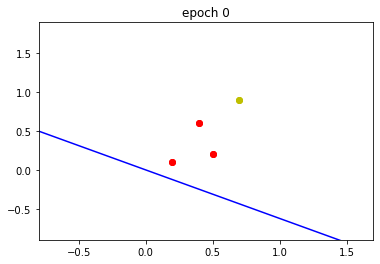

Error at epoch 1: 16
epochs 1: the weight:[[ 0.  ]
 [-0.2 ]
 [-0.32]] 



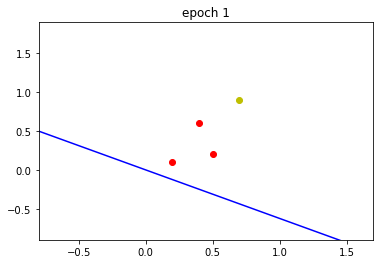

Error at epoch 2: 8
epochs 2: the weight:[[ 0.2 ]
 [-0.22]
 [-0.36]] 



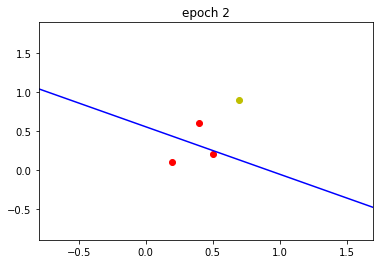

Error at epoch 3: 12
epochs 3: the weight:[[ 0.2 ]
 [-0.28]
 [-0.42]] 



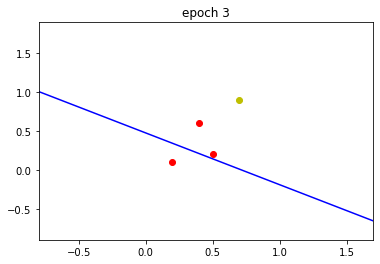

Error at epoch 4: 4
epochs 4: the weight:[[ 0.4]
 [-0.2]
 [-0.3]] 



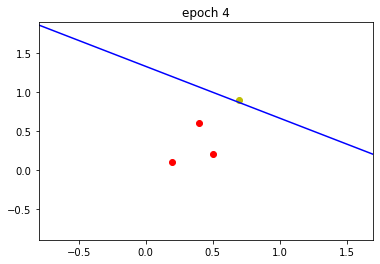

In [4]:
#small dataset for sequential training
X = np.array([
    [0.2, 0.1],
    [0.4, 0.6],
    [0.5, 0.2],
    [0.7, 0.9]
])
y = np.array([1, 1, 1, -1]).reshape(4)
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'yo')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'ro')
plt.xlim(-1,2)
plt.ylim(-0.75,1.25)
perceptron = Perceptron(X, y, epochs=10, lr=0.2)
w,err,_ = perceptron.seq_fit(verbose = True,plot=True)
#w, err, _ = perceptron.batch_fit(verbose=True,plot=True)

## Linearly Separable Dataset

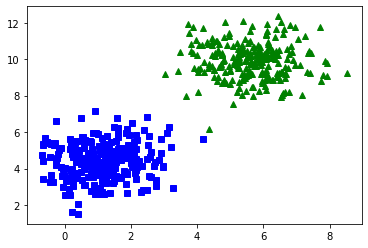

[[42.        ]
 [-6.74116944]
 [-2.40491036]]


In [37]:
#linear separable dataset/SGD
n = 500
X, y = datasets.make_blobs(n_samples=n, centers=2, n_features=2, center_box=(0, 10), cluster_std=1, random_state=1247)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()

y = y*2-1
y = y.reshape(n,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3,random_state=420)

perceptron = Perceptron(X_train, Y_train, epochs=100,lr=0.5)
w, in_err, converge_iter = perceptron.seq_fit()

print(w)
#print(converge_iter)
#print(in_err)

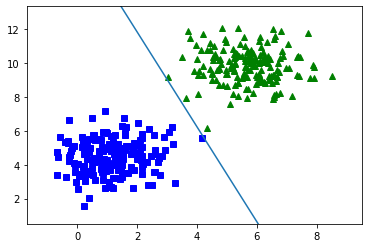

In [39]:
y = Y_train.reshape(len(Y_train),)
plt.plot(X_train[:, 0][y == -1], X_train[:, 1][y == -1], 'g^')
plt.plot(X_train[:, 0][y == 1], X_train[:, 1][y == 1], 'bs')
xx = np.linspace(-1,11)
yy = (w[1][0]*xx + w[0][0])/(-1*w[2][0])

plt.plot(xx, yy)
plt.xlim(np.min(X[:, 0])-1, np.max(X[:, 0])+1)
plt.ylim(np.min(X[:, 1])-1, np.max(X[:, 1])+1)
plt.show()


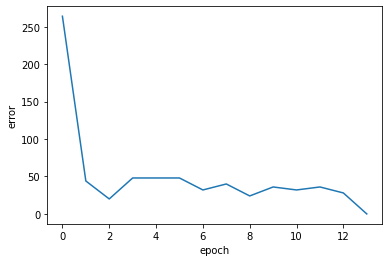

[264, 44, 20, 48, 48, 48, 32, 40, 24, 36, 32, 36, 28, 0]


In [27]:
#error
plt.plot(in_err)
plt.ylabel('error')
plt.xlabel('epoch')
plt.show()
print(in_err)

In [40]:
y_pred = []
X_test = np.c_[np.ones(X_test.shape[0]), X_test]
for i in range(len(X_test)):
 y_pred.append(perceptron.predict(X_test[i]))
acc1 = accuracy_score(Y_test, y_pred)

print(acc1)

1.0


## Nonlinearly Separable Dataset

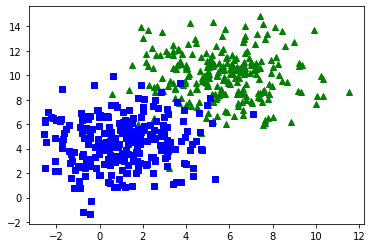

In [42]:
#linear non-separable
n = 500
X, y = datasets.make_blobs(n_samples=n, centers=2, n_features=2, center_box=(0, 10), cluster_std=2, random_state=1247)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()

y = y*2-1
y = y.reshape(n,1)

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X, y, test_size=0.3,random_state=420)

perceptron = Perceptron(X_train_1, Y_train_1, epochs=100,lr = 0.01)
w, in_err2, converge_iter = perceptron.seq_fit(plot=False)

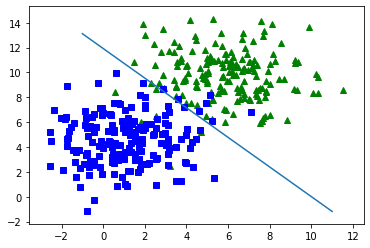

In [43]:
y_1 = Y_train_1.reshape(len(Y_train_1),)
plt.plot(X_train_1[:, 0][y_1 == -1], X_train_1[:, 1][y_1 == -1], 'g^')
plt.plot(X_train_1[:, 0][y_1 == 1], X_train_1[:, 1][y_1 == 1], 'bs')
xx = np.linspace(-1,11)
yy = (w[1][0]*xx + w[0][0])/(-1*w[2][0])

plt.plot(xx, yy)
plt.xlim(np.min(X_train_1[:, 0])-1, np.max(X_train_1[:, 0])+1)
plt.ylim(np.min(X_train_1[:, 1])-1, np.max(X_train_1[:, 1])+1)
plt.show()

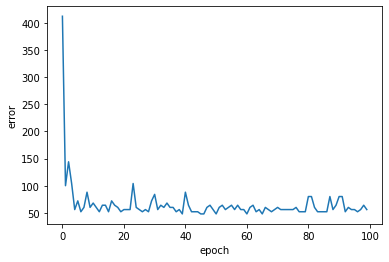

[412, 100, 144, 104, 56, 72, 52, 60, 88, 60, 68, 60, 52, 64, 64, 52, 72, 64, 60, 52, 56, 56, 56, 104, 60, 56, 52, 56, 52, 72, 84, 56, 64, 60, 68, 60, 60, 52, 56, 48, 88, 64, 52, 52, 52, 48, 48, 60, 64, 56, 48, 60, 64, 56, 60, 64, 56, 64, 56, 56, 48, 60, 64, 52, 56, 48, 60, 56, 52, 56, 60, 56, 56, 56, 56, 56, 60, 52, 52, 52, 80, 80, 60, 52, 52, 52, 52, 80, 56, 64, 80, 80, 52, 60, 56, 56, 52, 56, 64, 56]


In [ ]:
#error
plt.plot(in_err2)
plt.ylabel('error')
plt.xlabel('epoch')
plt.show()
print(in_err2)

In [ ]:
y_pred_1 = []
X_test_1 = np.c_[np.ones(X_test_1.shape[0]), X_test_1]
for i in range(len(X_test_1)):
 y_pred_1.append(perceptron.predict(X_test_1[i]))
acc2 = accuracy_score(Y_test_1, y_pred_1)
print(acc2)

0.9866666666666667


# Batch Training

## Toy Dataset

epochs 0: the weight:[[0.15 ]
 [0.055]
 [0.045]] 



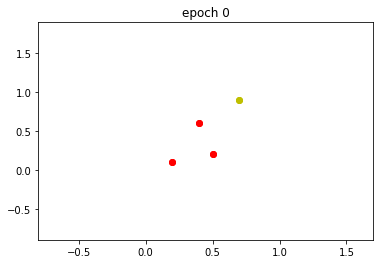

epochs 1: the weight:[[ 1.0000000e-01]
 [ 2.0000000e-02]
 [-6.9388939e-18]] 



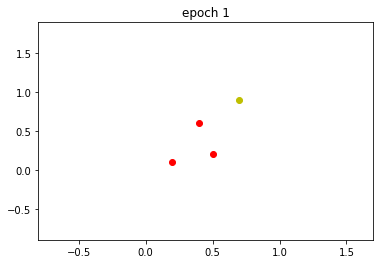

epochs 2: the weight:[[ 0.05 ]
 [-0.015]
 [-0.045]] 



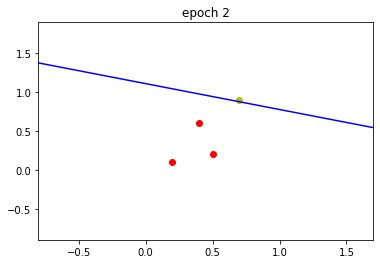

In [ ]:
#small dataset for batch training
X = np.array([
    [0.2, 0.1],
    [0.4, 0.6],
    [0.5, 0.2],
    [0.7, 0.9]
])
y = np.array([1, 1, 1, -1]).reshape(4)
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'yo')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'ro')
plt.xlim(-1,2)
plt.ylim(-0.75,1.25)
perceptron = Perceptron(X, y, epochs=100,lr = 0.05)
w, err, _ = perceptron.batch_fit(plot=True)

## Linear Sperabale Dataset

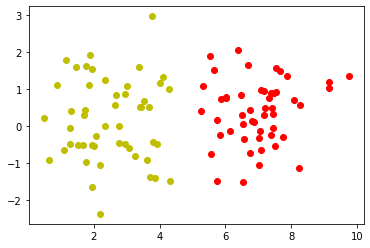

Error at epoch 0: 148
Error at epoch 1: 148
Error at epoch 2: 140
Error at epoch 3: 132
Error at epoch 4: 148
Error at epoch 5: 140
Error at epoch 6: 132
Error at epoch 7: 148
Error at epoch 8: 140
Error at epoch 9: 16
Error at epoch 10: 24
Error at epoch 11: 128
Error at epoch 12: 144
Error at epoch 13: 140
Error at epoch 14: 20
Error at epoch 15: 44
Error at epoch 16: 100
Error at epoch 17: 132
Error at epoch 18: 140
Error at epoch 19: 132
Error at epoch 20: 8
Error at epoch 21: 0
[[-253.        ]
 [  55.2706409 ]
 [  -8.86467876]] [148, 148, 140, 132, 148, 140, 132, 148, 140, 16, 24, 128, 144, 140, 20, 44, 100, 132, 140, 132, 8, 0] 23


In [ ]:
#linearly separable dataset for batch training
n=100
X, y = datasets.make_blobs(n_samples=n, centers=2, n_features=2, center_box=(0, 10), cluster_std=1, random_state=41)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'yo')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'ro')
plt.show()

y = y*2-1
y = y.reshape(n,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3,random_state=420)

perceptron = Perceptron(X_train, Y_train, epochs=200,lr = 1)
w, in_err, converge_iter = perceptron.batch_fit(verbose=True)
print(w, in_err, converge_iter)

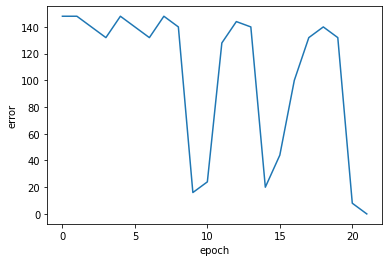

[148, 148, 140, 132, 148, 140, 132, 148, 140, 16, 24, 128, 144, 140, 20, 44, 100, 132, 140, 132, 8, 0]


In [ ]:
plt.plot(in_err)
plt.ylabel('error')
plt.xlabel('epoch')
plt.show()
print(in_err)

In [ ]:
y_pred_2 = []
X_test = np.c_[np.ones(X_test.shape[0]), X_test]
for i in range(len(X_test)):
 y_pred_2.append(perceptron.predict(X_test[i]))
acc3 = accuracy_score(Y_test, y_pred_2)
print(acc3)

1.0
